INFO 2020-11-12 12:11:56,534 Checkpoint loaded from models\01_cartpole_ac.tar
100%|██████████| 100/100 [00:03<00:00, 25.89it/s]
INFO 2020-11-12 12:12:00,423 Checkpoint saved to models\01_cartpole_ac.tar


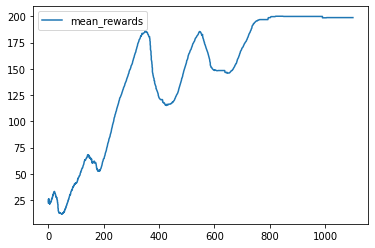

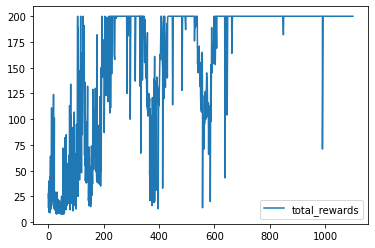

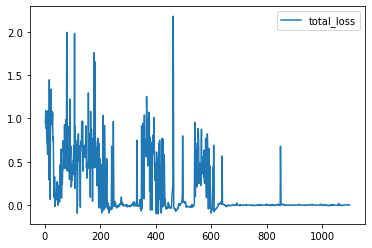

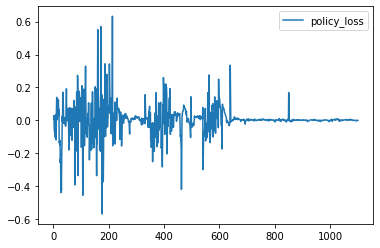

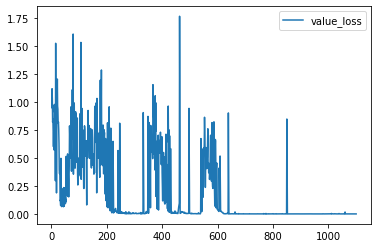

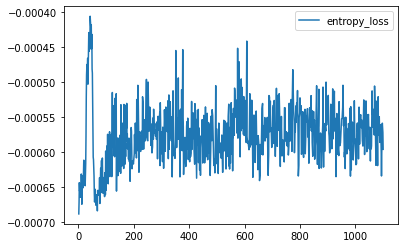

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import DiscreteActorCritic
from src.networks import DiscreteActorCriticNetwork

GAMMA = 0.99
LEARNING_RATE = 0.01
ENTROPY_BETA = 0.001
N_STEPS = 8
BATCH_SIZE = 16

CHECKPOINT_PATH = os.path.join("models", "01_cartpole_ac.tar")



env = gym.make("CartPole-v0")
test_env = gym.make("CartPole-v0")
device = torch.device("cpu")
net = DiscreteActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.n
).to(device)

agent = DiscreteActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    # chk_path=None,
    chk_path=CHECKPOINT_PATH,
)

In [ ]:
agent.train(100, verbose_every=0)
agent.plot_performance()

In [21]:
agent.test(num_episodes=100)

200.0

In [13]:
agent.exp_test_source.play_episodes(2)

[[Experience(state=array([ 0.04386158,  0.01774574,  0.04859409, -0.02683322]), action=1, reward=8.0, last_state=array([0.06195943, 0.01317896, 0.02861907, 0.07396911]), discounted_reward=7.72553055720799, steps=8),
  Experience(state=array([0.06195943, 0.01317896, 0.02861907, 0.07396911]), action=1, reward=8.0, last_state=array([ 0.09509979,  0.01118026, -0.00224592,  0.118029  ]), discounted_reward=7.72553055720799, steps=8),
  Experience(state=array([ 0.09509979,  0.01118026, -0.00224592,  0.118029  ]), action=1, reward=8.0, last_state=array([ 0.11251559,  0.01150543, -0.00715533,  0.1108589 ]), discounted_reward=7.72553055720799, steps=8),
  Experience(state=array([ 0.11251559,  0.01150543, -0.00715533,  0.1108589 ]), action=1, reward=8.0, last_state=array([ 0.13002556,  0.01247497, -0.01414203,  0.08947721]), discounted_reward=7.72553055720799, steps=8),
  Experience(state=array([ 0.13002556,  0.01247497, -0.01414203,  0.08947721]), action=1, reward=8.0, last_state=array([ 0.14775